In [67]:
import numpy as np
import pandas as pd 

red_df = pd.read_csv('winequality-red.csv', sep=';')
white_df = pd.read_csv('winequality-white.csv', sep=';')

# Add a new column to distinguish between red and white wines
red_df['type']  =  'Red'
white_df['type'] = 'White'

# # Combine the datasets 
all_df = pd.concat([red_df, white_df], ignore_index=True)   
all_df  

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,White
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,White
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,White
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,White


In [28]:

# Encode wine_type as categorical
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
all_df['type'] = label_encoder.fit_transform(all_df['type'])  # Encode wine type
# Check the encoding        
print(all_df['type'].value_counts()) 
all_df

type
1    4898
0    1599
Name: count, dtype: int64


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


C:\Users\skyli\AppData\Local\Temp\ipykernel_18052\1858498208.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=all_df, palette='Set2')


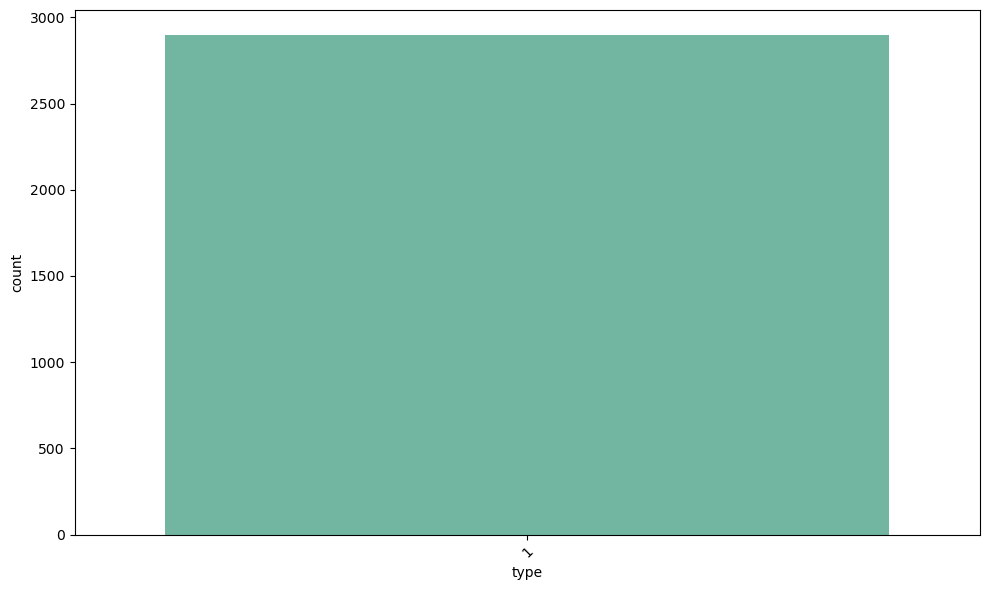

In [ ]:
# 'Data Cleaning '
# all_df.info()   
all_df.isnull().sum()  
all_df.describe()
all_df.duplicated().sum() 
all_df.drop_duplicates(inplace=True) 
all_df.reset_index(drop=True, inplace=True)  # Reset index after dropping duplicates
all_df.duplicated().sum() 

# #Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt     
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=all_df, palette='Set2')    
# Display the count of each wine type
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability      
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

# plt.figure(figsize=(12, 8)) 
# sns.boxplot(x='type', y='quality', data=all_df, palette='Set2')
# plt.title('Wine Quality by Type')   
# plt.xlabel('Wine Type')
# plt.ylabel('Quality')   
# plt.show()  


# #apply IQR method to all numerical columns  
# all_df = remove_outliers(all_df, 'fixed acidity')  # Remove outliers in 'fixed acidity' column  
# all_df = remove_outliers(all_df, 'volatile acidity')  # Remove outliers in 'volatile acidity' column
# all_df = remove_outliers(all_df, 'citric acid')  # Remove outliers in 'citric acid' column
# all_df = remove_outliers(all_df, 'residual sugar')  # Remove outliers in 'residual sugar' column
# all_df = remove_outliers(all_df, 'chlorides')  # Remove outliers in 'chlorides' column              
# all_df = remove_outliers(all_df, 'free sulfur dioxide')  # Remove outliers in 'free sulfur dioxide' column
# all_df = remove_outliers(all_df, 'total sulfur dioxide')  # Remove outliers in 'total sulfur dioxide' column
# all_df = remove_outliers(all_df, 'density')  # Remove outliers in 'density' column              
# all_df = remove_outliers(all_df, 'pH')  # Remove outliers in 'pH' column
# all_df = remove_outliers(all_df, 'sulphates')  # Remove outliers in 'sulphates' column
# all_df = remove_outliers(all_df, 'alcohol')          # Remove outliers in 'alcohol' column              
# all_df = remove_outliers(all_df, 'type')  # Remove outliers in 'type' column                 
# all_df = remove_outliers(all_df, 'quality')  # Remove outliers in 'quality' column  

# Check for outliers again
# for column in all_df.select_dtypes(include=[np.number]).columns:
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=all_df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()  









In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]        
for column in all_df.select_dtypes(include=[np.number]).columns:
    all_df = remove_outliers(all_df, column)   
    
    
# Apply IQR removal on all numeric features
    features_to_check = all_df.select_dtypes(include='number').columns.drop(['quality'])  # exclude target if needed
    all_df_cleaned = remove_outliers_iqr(all_df.copy(), features_to_check)

    print("Original shape:", all_df.shape)
    print("After outlier removal:", all_df_cleaned.shape)

NameError: name 'remove_outliers_iqr' is not defined